In [16]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree       # Import Decision Tree Classifier and plot_tree 
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn import metrics                           # Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [18]:
df = pd.read_csv("Wholesale customers data.csv")
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [20]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [22]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [28]:
feature_cols = ['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = df[feature_cols]
y = df.Channel

print(X,y)

     Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0         3  12669   9656     7561     214              2674        1338
1         3   7057   9810     9568    1762              3293        1776
2         3   6353   8808     7684    2405              3516        7844
3         3  13265   1196     4221    6404               507        1788
4         3  22615   5410     7198    3915              1777        5185
..      ...    ...    ...      ...     ...               ...         ...
435       3  29703  12051    16027   13135               182        2204
436       3  39228   1431      764    4510                93        2346
437       3  14531  15488    30243     437             14841        1867
438       3  10290   1981     2232    1038               168        2125
439       3   2787   1698     2510      65               477          52

[440 rows x 7 columns] 0      2
1      2
2      2
3      1
4      2
      ..
435    1
436    1
437    2
438    1
439    1
N

In [30]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) # 70% training and 30% test

In [32]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((440, 7), (440,), (308, 7), (132, 7), (308,), (132,))

In [34]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini', max_depth = 4, random_state = 0)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [36]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.8863636363636364
Accuracy: 0.89


In [38]:
X.columns.tolist()

['Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicassen']

In [40]:
df['Channel'].unique().tolist()

[2, 1]

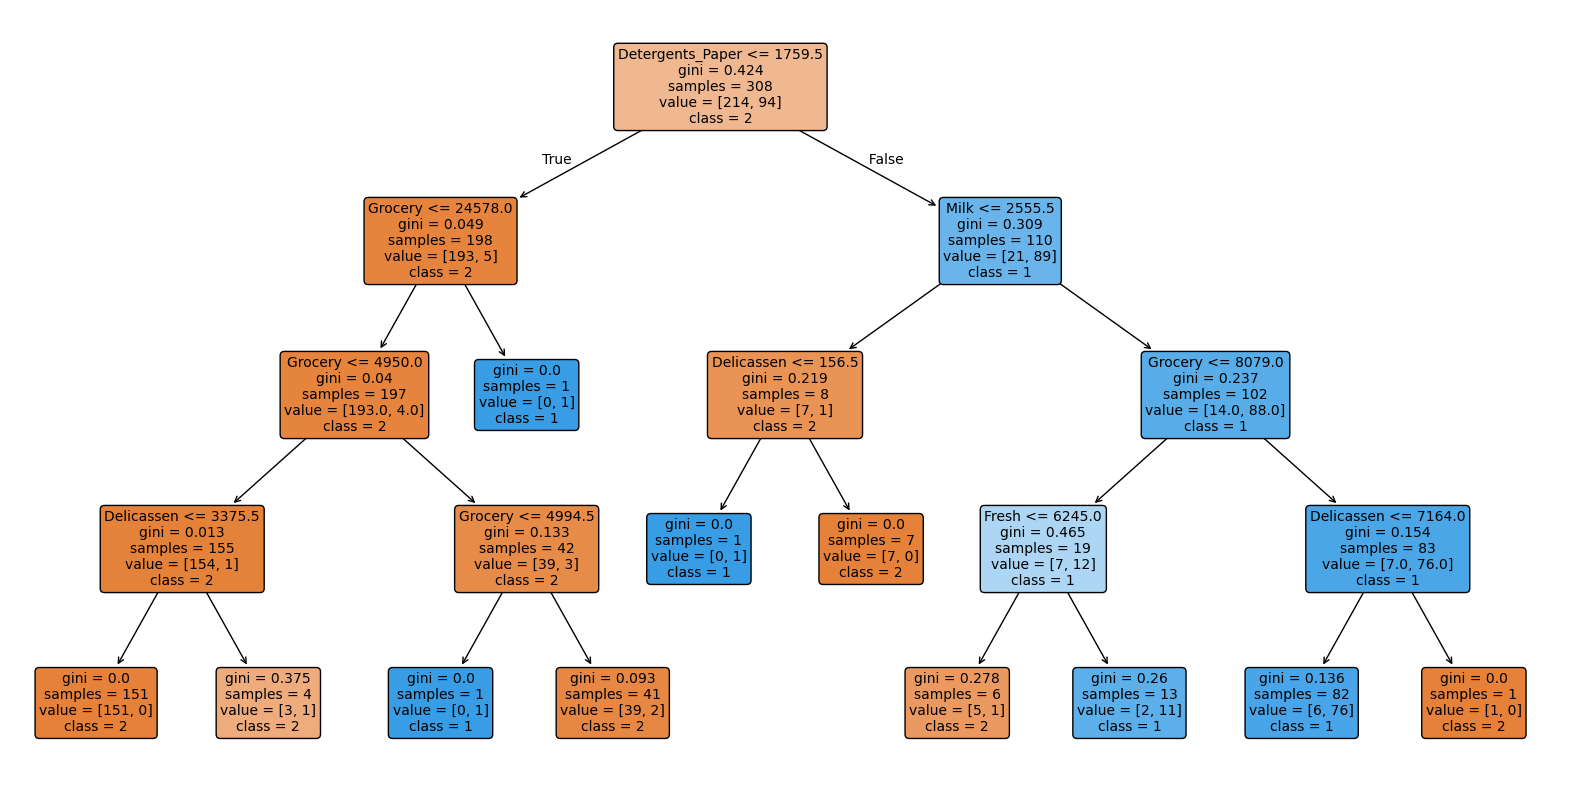

In [42]:
# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=[str(Channel) for Channel in df['Channel'].unique()], rounded=True, fontsize=10)
plt.show()


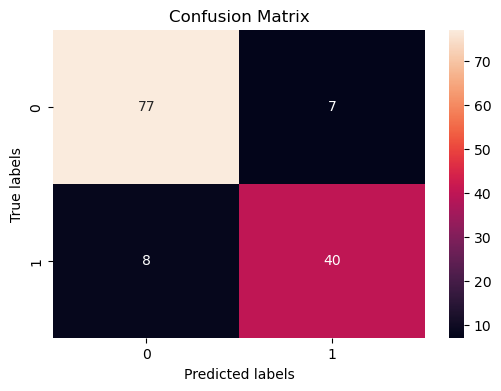

Classification Report:
              precision    recall  f1-score   support

           1       0.91      0.92      0.91        84
           2       0.85      0.83      0.84        48

    accuracy                           0.89       132
   macro avg       0.88      0.88      0.88       132
weighted avg       0.89      0.89      0.89       132



In [44]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict by using an object classifier 'clf'
y_predict = clf.predict(X_test)

# Calculate cm by using a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_predict)

# Plot confusion matrix with integers using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d')  # 'd' stands for integer format
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
report = classification_report(y_test, y_predict)
print("Classification Report:")
print(report)